In [1]:
## Differentiable Power Spectra Example

In [19]:
#ugly for now...
import sys
sys.path.insert(0, "../code/utils")
from ps import *

In [29]:
import tensorflow as tf

def example_driver(L,seed=11):
    
    #example for testing...
    
    tf.random.set_seed(seed)
    field = tf.random.normal((80,80,80),stddev=L)
    
    return ps.pk(field,shape = field.shape, boxsize= np.array([3,3,3]))


Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'P(k)')

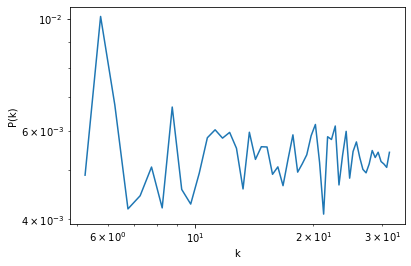

In [41]:
%pylab inline
#white noise powerspectra...
plt.loglog(example_driver(10)[0],example_driver(10)[1])
plt.xlabel("k")
plt.ylabel("P(k)")

Text(0, 0.5, 'P(k)')

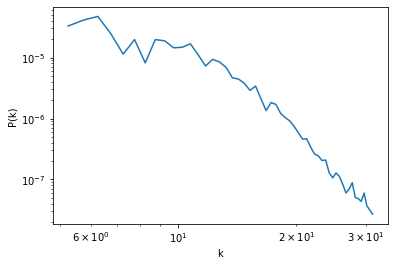

In [40]:
from scipy import ndimage
field = tf.random.normal((80,80,80))
field_smoothed = ndimage.gaussian_filter(field,3)
ps_out = ps.pk(field_smoothed,shape = field.shape, boxsize= np.array([3,3,3]))
plt.loglog(ps_out[0],ps_out[1])
plt.xlabel("k")
plt.ylabel("P(k)")

In [43]:
#checking gradient...
_L = tf.Variable(1, trainable=True, dtype=tf.float32)
trainable_variables = [_L]

L_true = 0.9
PK_fid = example_driver(L_true)[1]

with tf.GradientTape() as tape:
        loss = tf.reduce_mean((PK_fid-example_driver(_L)[1])**2)
        
gradients = tape.gradient(loss, [_L])
print("nearby gradient", gradients)

_L = tf.Variable(0.9, trainable=True, dtype=tf.float32)
trainable_variables = [_L]

with tf.GradientTape() as tape:
        loss = tf.reduce_mean((PK_fid-example_driver(_L)[1])**2)
        
gradients = tape.gradient(loss, [_L])
print("exactly on top", gradients)


nearby gradient [<tf.Tensor: id=3214, shape=(), dtype=float32, numpy=2.2714768e-09>]
exactly on top [<tf.Tensor: id=3434, shape=(), dtype=float32, numpy=0.0>]
